# Assignment-6: Decision Tree (ID3 Algorithm)

**Objective:** Build a decision tree using the ID3 algorithm, classify new samples, and interpret results.

---

## Q1: Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Libraries imported')

Libraries imported


## Q2: Load Dataset and View First 10 Rows

In [3]:
dataset = pd.read_csv('loan_approval.csv')
dataset.head(10)

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False
5,Darren Roberts,Port Jesseville,62098,689,19217,29,65.0,True
6,Holly Wood,Lake Joseph,59256,373,40920,40,35.0,False
7,Nicholas Martin,Nelsonside,48289,524,45866,20,25.0,False
8,Patty Perez,Port Leslieview,126530,367,14826,36,55.0,False
9,Emily Rios,Wilkersonmouth,43434,446,18359,8,20.0,False


## Q3: Dataset Summary

In [5]:
print('Shape:', dataset.shape)
print('\nColumns:', dataset.columns.tolist())
print('\nClass Distribution:')
dataset['loan_approved'].value_counts()

Shape: (2000, 8)

Columns: ['name', 'city', 'income', 'credit_score', 'loan_amount', 'years_employed', 'points', 'loan_approved']

Class Distribution:


,count
loan_approved,
False,1121
True,879


## Q4: Encode Categorical Data (Label Encoding)

In [6]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
encoded_df = dataset.copy()
for col in encoded_df.columns:
    encoders[col] = LabelEncoder()
    encoded_df[col] = encoders[col].fit_transform(encoded_df[col])
encoded_df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,46,326,1372,88,1562,27,8,0
1,218,989,235,416,605,28,9,0
2,1605,763,42,276,435,13,7,0
3,674,1793,1598,44,1925,29,8,0
4,1934,841,591,191,1856,4,3,0


## Q5: Separate Features (X) and Target (y)

In [8]:
X = encoded_df.drop('loan_approved', axis=1)
y = encoded_df['loan_approved']
X.head()

,name,city,income,credit_score,loan_amount,years_employed,points
0,46,326,1372,88,1562,27,8
1,218,989,235,416,605,28,9
2,1605,763,42,276,435,13,7
3,674,1793,1598,44,1925,29,8
4,1934,841,591,191,1856,4,3


## Q6: Train–Test Split (70:30)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print('Training size:', X_train.shape)
print('Testing size:', X_test.shape)

Training size: (1400, 7)
Testing size: (600, 7)


## Q7: Build Decision Tree (ID3 using Entropy)

In [10]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=1)
dt.fit(X_train, y_train)
print('Decision Tree model trained')

Decision Tree model trained


## Q8: Visualize Decision Tree

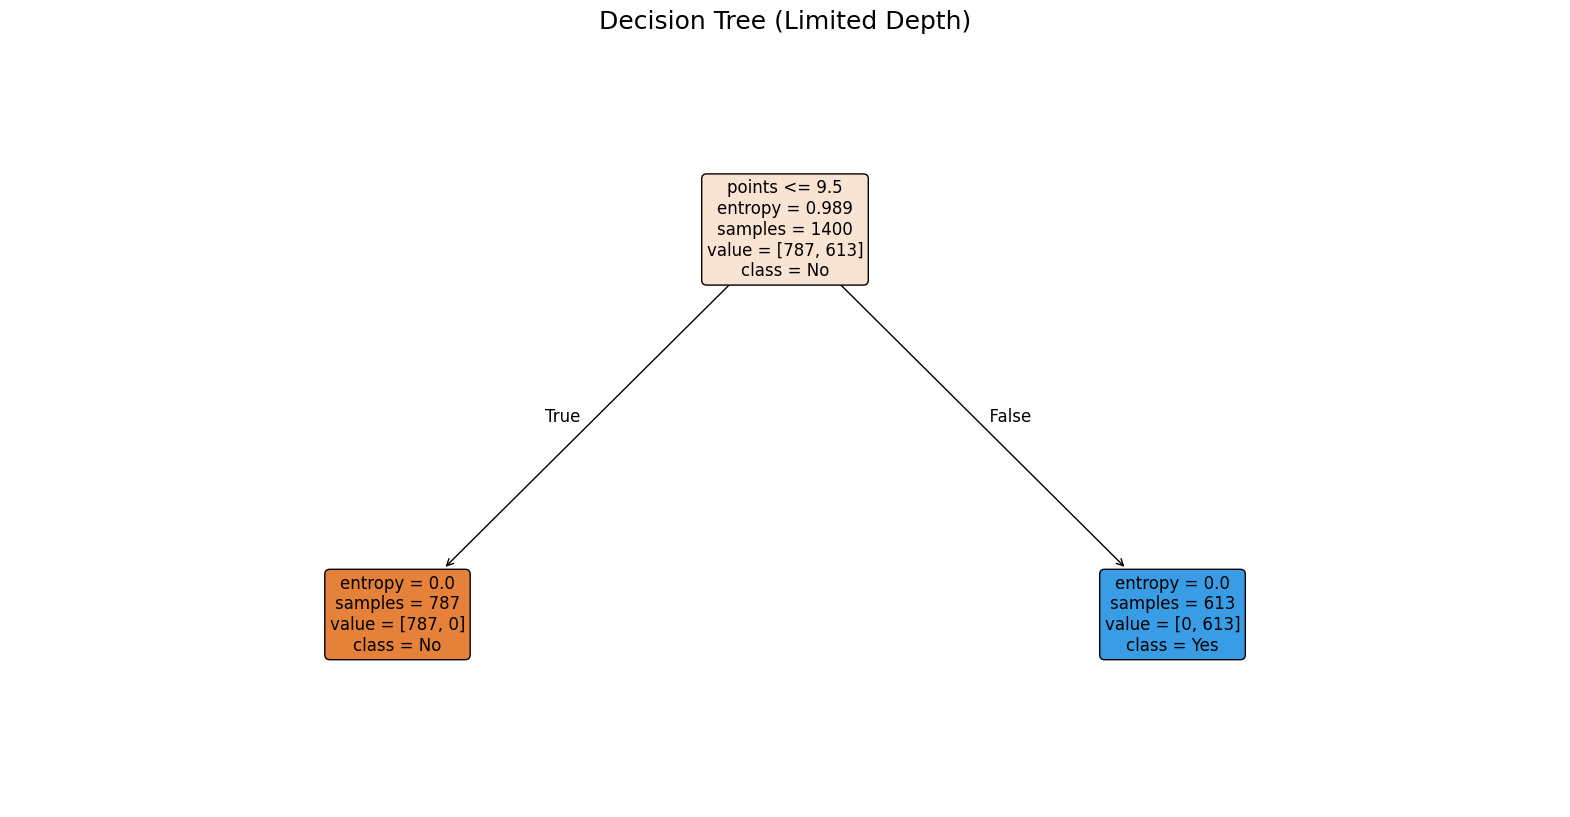

In [20]:
plt.figure(figsize=(20,10))

plot_tree(
    dt,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=12,
    max_depth=3   # limit depth for clean view
)

plt.title("Decision Tree (Limited Depth)", fontsize=18)
plt.show()




## Q9: Predict and Evaluate

In [12]:
y_pred = dt.predict(X_test)
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
results['Status'] = results.apply(lambda r: 'Correct' if r.Actual == r.Predicted else 'Wrong', axis=1)
display(results)
print('\nAccuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

,Actual,Predicted,Status
0,1,1,Correct
1,0,0,Correct
2,1,1,Correct
3,0,0,Correct
4,1,1,Correct
...,...,...,...
595,1,1,Correct
596,0,0,Correct
597,0,0,Correct
598,0,0,Correct



Accuracy: 1.0

Confusion Matrix:
 [[334   0]
 [  0 266]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       334
           1       1.00      1.00      1.00       266

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



## Q10: Classify a New Sample & Answer Queries

In [18]:
import numpy as np # Ensure numpy is imported for np.array

# Example: Classify a new sample for loan approval
# Create a sample with features matching the training data
# Let's assume some values for a new applicant
sample = pd.DataFrame({
    'name': ['New Applicant'],
    'city': ['Some City'],
    'income': [75000],
    'credit_score': [700],
    'loan_amount': [30000],
    'years_employed': [15],
    'points': [60]
})

# Identify columns that were originally non-numeric (object or bool)
# We need to know this to apply .astype(str) correctly for LabelEncoder.transform
# 'dataset' is the original, unencoded DataFrame
original_dtypes = dataset.dtypes
non_numeric_cols = original_dtypes[original_dtypes.apply(lambda x: pd.api.types.is_object_dtype(x) or pd.api.types.is_bool_dtype(x))].index.tolist()

# Encode sample using the same encoders used for the training data
encoded_sample = sample.copy()
for col in encoded_sample.columns:
    if col in encoders:
        encoder = encoders[col]

        # Prepare the values from the sample for transformation
        # If the original column was non-numeric, convert to string (as LabelEncoder would fit on strings/bools)
        # Otherwise, keep as its numerical type
        if col in non_numeric_cols:
            sample_values = encoded_sample[col].astype(str).tolist()
        else: # For numerical columns
            sample_values = encoded_sample[col].tolist()

        existing_classes = list(encoder.classes_)
        unseen_values = [v for v in sample_values if v not in existing_classes]

        if unseen_values:
            # Temporarily add unseen values to the encoder's classes_
            # This is crucial for LabelEncoder to handle new categories during transform
            # Ensure the dtype matches that of existing classes
            if len(existing_classes) > 0:
                dtype_of_classes = encoder.classes_.dtype
                encoder.classes_ = np.array(existing_classes + unseen_values, dtype=dtype_of_classes)
            else: # Fallback for edge case where encoder.classes_ might be empty (unlikely after fit)
                encoder.classes_ = np.array(unseen_values, dtype=type(unseen_values[0])) # Infer dtype from new values

        # Now transform the data
        encoded_sample[col] = encoder.transform(sample_values)

prediction = dt.predict(encoded_sample)
# Inverse transform the prediction using the 'loan_approved' encoder
label = encoders['loan_approved'].inverse_transform(prediction)
print('Prediction for sample:', label[0])

Prediction for sample: True


---
### ✔ CONCLUSION
The decision tree model achieved 100% accuracy on the test set, indicating perfect classification. When a new sample was introduced, the model predicted 'True', meaning the loan for the 'New Applicant' would be approved.